In [3]:
# Import Packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.linear_model import LinearRegression

In [4]:
# Import Dataset
path = "C:\candidatesummaryaction1.csv"
seg = pd.read_csv(path)

### Data Wrangling

In [5]:
# Drop unncessary columns
seg = seg.drop(columns = ['can_nam', 'can_off_dis', 'can_str1', 'can_str2', 'can_cit', 'can_zip', 'ind_ite_con', 'ind_uni_con', 'oth_com_con', 'tra_fro_oth_aut_com','can_loa', 'oth_loa', 'tot_loa', 'off_to_ope_exp', 'off_to_fun', 'off_to_leg_acc', 'oth_rec', 'tot_rec', 'exe_leg_acc_dis', 'fun_dis', 'tra_to_oth_aut_com', 'can_loa_rep', 'oth_loa_rep', 'tot_loa_rep', 'ind_ref', 'par_com_ref','oth_com_ref','tot_con_ref', 'tot_dis', 'deb_owe_by_com', 'deb_owe_to_com'])

In [6]:
# Change blank values in the winner column to no (N)
seg['winner'] = seg['winner'].fillna('N')

In [7]:
# Drop non-numerical rows that have NA values
seg = seg.dropna(subset = ['can_inc_cha_ope_sea'])

In [8]:
# Fill in other applicable missing values with 0
seg = seg.fillna(0)

In [9]:
# Convert numerical values to float
# ind_con
seg['ind_con'] = seg.ind_con.str.replace(',', '')
seg['ind_con'] = seg.ind_con.str.replace('$', '')
seg['ind_con']= seg.ind_con.astype(float)
# par_com_con
seg['par_com_con'] = seg.par_com_con.str.replace(',', '')
seg['par_com_con'] = seg.par_com_con.str.replace('$', '')
seg['par_com_con'] = seg.par_com_con.astype(float)
# tot_con
seg['tot_con'] = seg.tot_con.str.replace(',', '')
seg['tot_con'] = seg.tot_con.str.replace('$', '')
seg['tot_con'] = seg.tot_con.astype(float)
# ope_exp
seg['ope_exp'] = seg.ope_exp.str.replace(',', '')
seg['ope_exp'] = seg.ope_exp.str.replace('$', '')
seg['ope_exp'] = seg.ope_exp.str.replace('(', '-')
seg['ope_exp'] = seg.ope_exp.str.replace(')', ' ')
seg['ope_exp'] = seg.ope_exp.astype(float)
# can_con
seg['can_con'] = seg.can_con.str.replace(',', '')
seg['can_con'] = seg.can_con.str.replace('$', '')
seg['can_con'] = seg.can_con.astype(float)
# oth_dis
seg['oth_dis'] = seg.oth_dis.str.replace(',', '')
seg['oth_dis'] = seg.oth_dis.str.replace('$', '')
seg['oth_dis'] = seg.oth_dis.str.replace('(', '-')
seg['oth_dis'] = seg.oth_dis.str.replace(')', '')
seg['oth_dis'] = seg.oth_dis.astype(float)
# cas_on_han_beg_of_per
seg['cas_on_han_beg_of_per'] = seg.cas_on_han_beg_of_per.str.replace(',', '')
seg['cas_on_han_beg_of_per'] = seg.cas_on_han_beg_of_per.str.replace('$', '')
seg['cas_on_han_beg_of_per'] = seg.cas_on_han_beg_of_per.str.replace('(', '-')
seg['cas_on_han_beg_of_per'] = seg.cas_on_han_beg_of_per.str.replace(')', '')
seg['cas_on_han_beg_of_per'] = seg.cas_on_han_beg_of_per.astype(float)
# cas_on_han_clo_of_per
seg['cas_on_han_clo_of_per'] = seg.cas_on_han_clo_of_per.str.replace(',', '')
seg['cas_on_han_clo_of_per'] = seg.cas_on_han_clo_of_per.str.replace('$', '')
seg['cas_on_han_clo_of_per'] = seg.cas_on_han_clo_of_per.str.replace('(', '-')
seg['cas_on_han_clo_of_per'] = seg.cas_on_han_clo_of_per.str.replace(')', '')
seg['cas_on_han_clo_of_per'] = seg.cas_on_han_clo_of_per.astype(float)
# net_con
seg['net_con'] = seg.net_con.str.replace(',', '')
seg['net_con'] = seg.net_con.str.replace('$', '')
seg['net_con'] = seg.net_con.str.replace('(', '-')
seg['net_con'] = seg.net_con.str.replace(')', '')
seg['net_con'] = seg.net_con.astype(float)
# net_ope_exp
seg['net_ope_exp'] = seg.net_ope_exp.str.replace(',', '')
seg['net_ope_exp'] = seg.net_ope_exp.str.replace('$', '')
seg['net_ope_exp'] = seg.net_ope_exp.str.replace('(', '-')
seg['net_ope_exp'] = seg.net_ope_exp.str.replace(')', '')
seg['net_ope_exp'] = seg.net_ope_exp.astype(float)

In [10]:
# Fill newly exposed NA values with 0
seg = seg.fillna(0)

In [11]:
# Review the data
seg.head(10)

,can_id,can_off,can_off_sta,can_par_aff,can_inc_cha_ope_sea,can_sta,ind_con,par_com_con,can_con,tot_con,ope_exp,oth_dis,cas_on_han_beg_of_per,cas_on_han_clo_of_per,net_con,net_ope_exp,cov_sta_dat,cov_end_dat,winner,votes
0,H2GA12121,H,GA,REP,INCUMBENT,GA,601274.50,0.00,0.0,1074949.50,908518.98,70000.00,60109.57,175613.35,1074949.50,907156.21,1/1/2015,10/19/2016,Y,158708.0
1,H6PA02171,H,PA,DEM,CHALLENGER,PA,1114711.02,0.00,0.0,1417545.22,1300557.53,2200.00,0.00,105687.23,1406719.06,1298831.83,11/2/2015,10/19/2016,Y,310770.0
2,H6FL04105,H,FL,REP,OPEN,FL,542105.38,0.00,2700.0,650855.38,656642.76,19000.00,0.00,35645.09,650855.38,656210.29,4/1/2016,10/19/2016,Y,286018.0
3,H4MT01041,H,MT,REP,INCUMBENT,MT,4317331.58,3545.32,0.0,4980915.41,5073110.33,43548.00,83815.78,399122.61,4938943.74,5055942.15,1/1/2015,10/19/2016,Y,280476.0
4,H8CA09060,H,CA,DEM,INCUMBENT,CA,897123.61,0.00,0.0,1205863.61,953436.94,150540.00,83690.60,181338.23,1197676.61,949488.98,1/1/2015,10/19/2016,Y,277390.0
5,H6NC04037,H,NC,DEM,INCUMBENT,NC,328804.52,300.00,0.0,728854.52,435688.13,236885.00,216409.21,274287.84,725854.52,430826.04,1/1/2015,10/19/2016,Y,275501.0
6,H2WI02124,H,WI,DEM,INCUMBENT,WI,393873.83,28.54,0.0,970547.37,445465.15,300275.96,187549.87,412220.80,970385.04,445438.15,1/1/2015,10/19/2016,Y,273520.0
7,H2MA09072,H,MA,DEM,INCUMBENT,MA,767049.56,0.00,0.0,1092269.56,464636.23,28360.00,406586.74,1010654.62,1092218.56,459790.68,1/1/2015,10/19/2016,Y,267944.0
8,H6OR02116,H,OR,REP,INCUMBENT,OR,969437.03,0.00,0.0,3012350.64,1937694.04,921525.73,997259.73,1264468.82,3004650.64,1911215.54,1/1/2015,10/19/2016,Y,267179.0
9,H2MA04073,H,MA,DEM,INCUMBENT,MA,1938192.38,0.00,0.0,2797967.38,1539411.68,0.00,1400008.58,2858165.71,2784362.26,1537844.39,1/1/2015,10/19/2016,Y,261356.0


### Re-Examining the Data

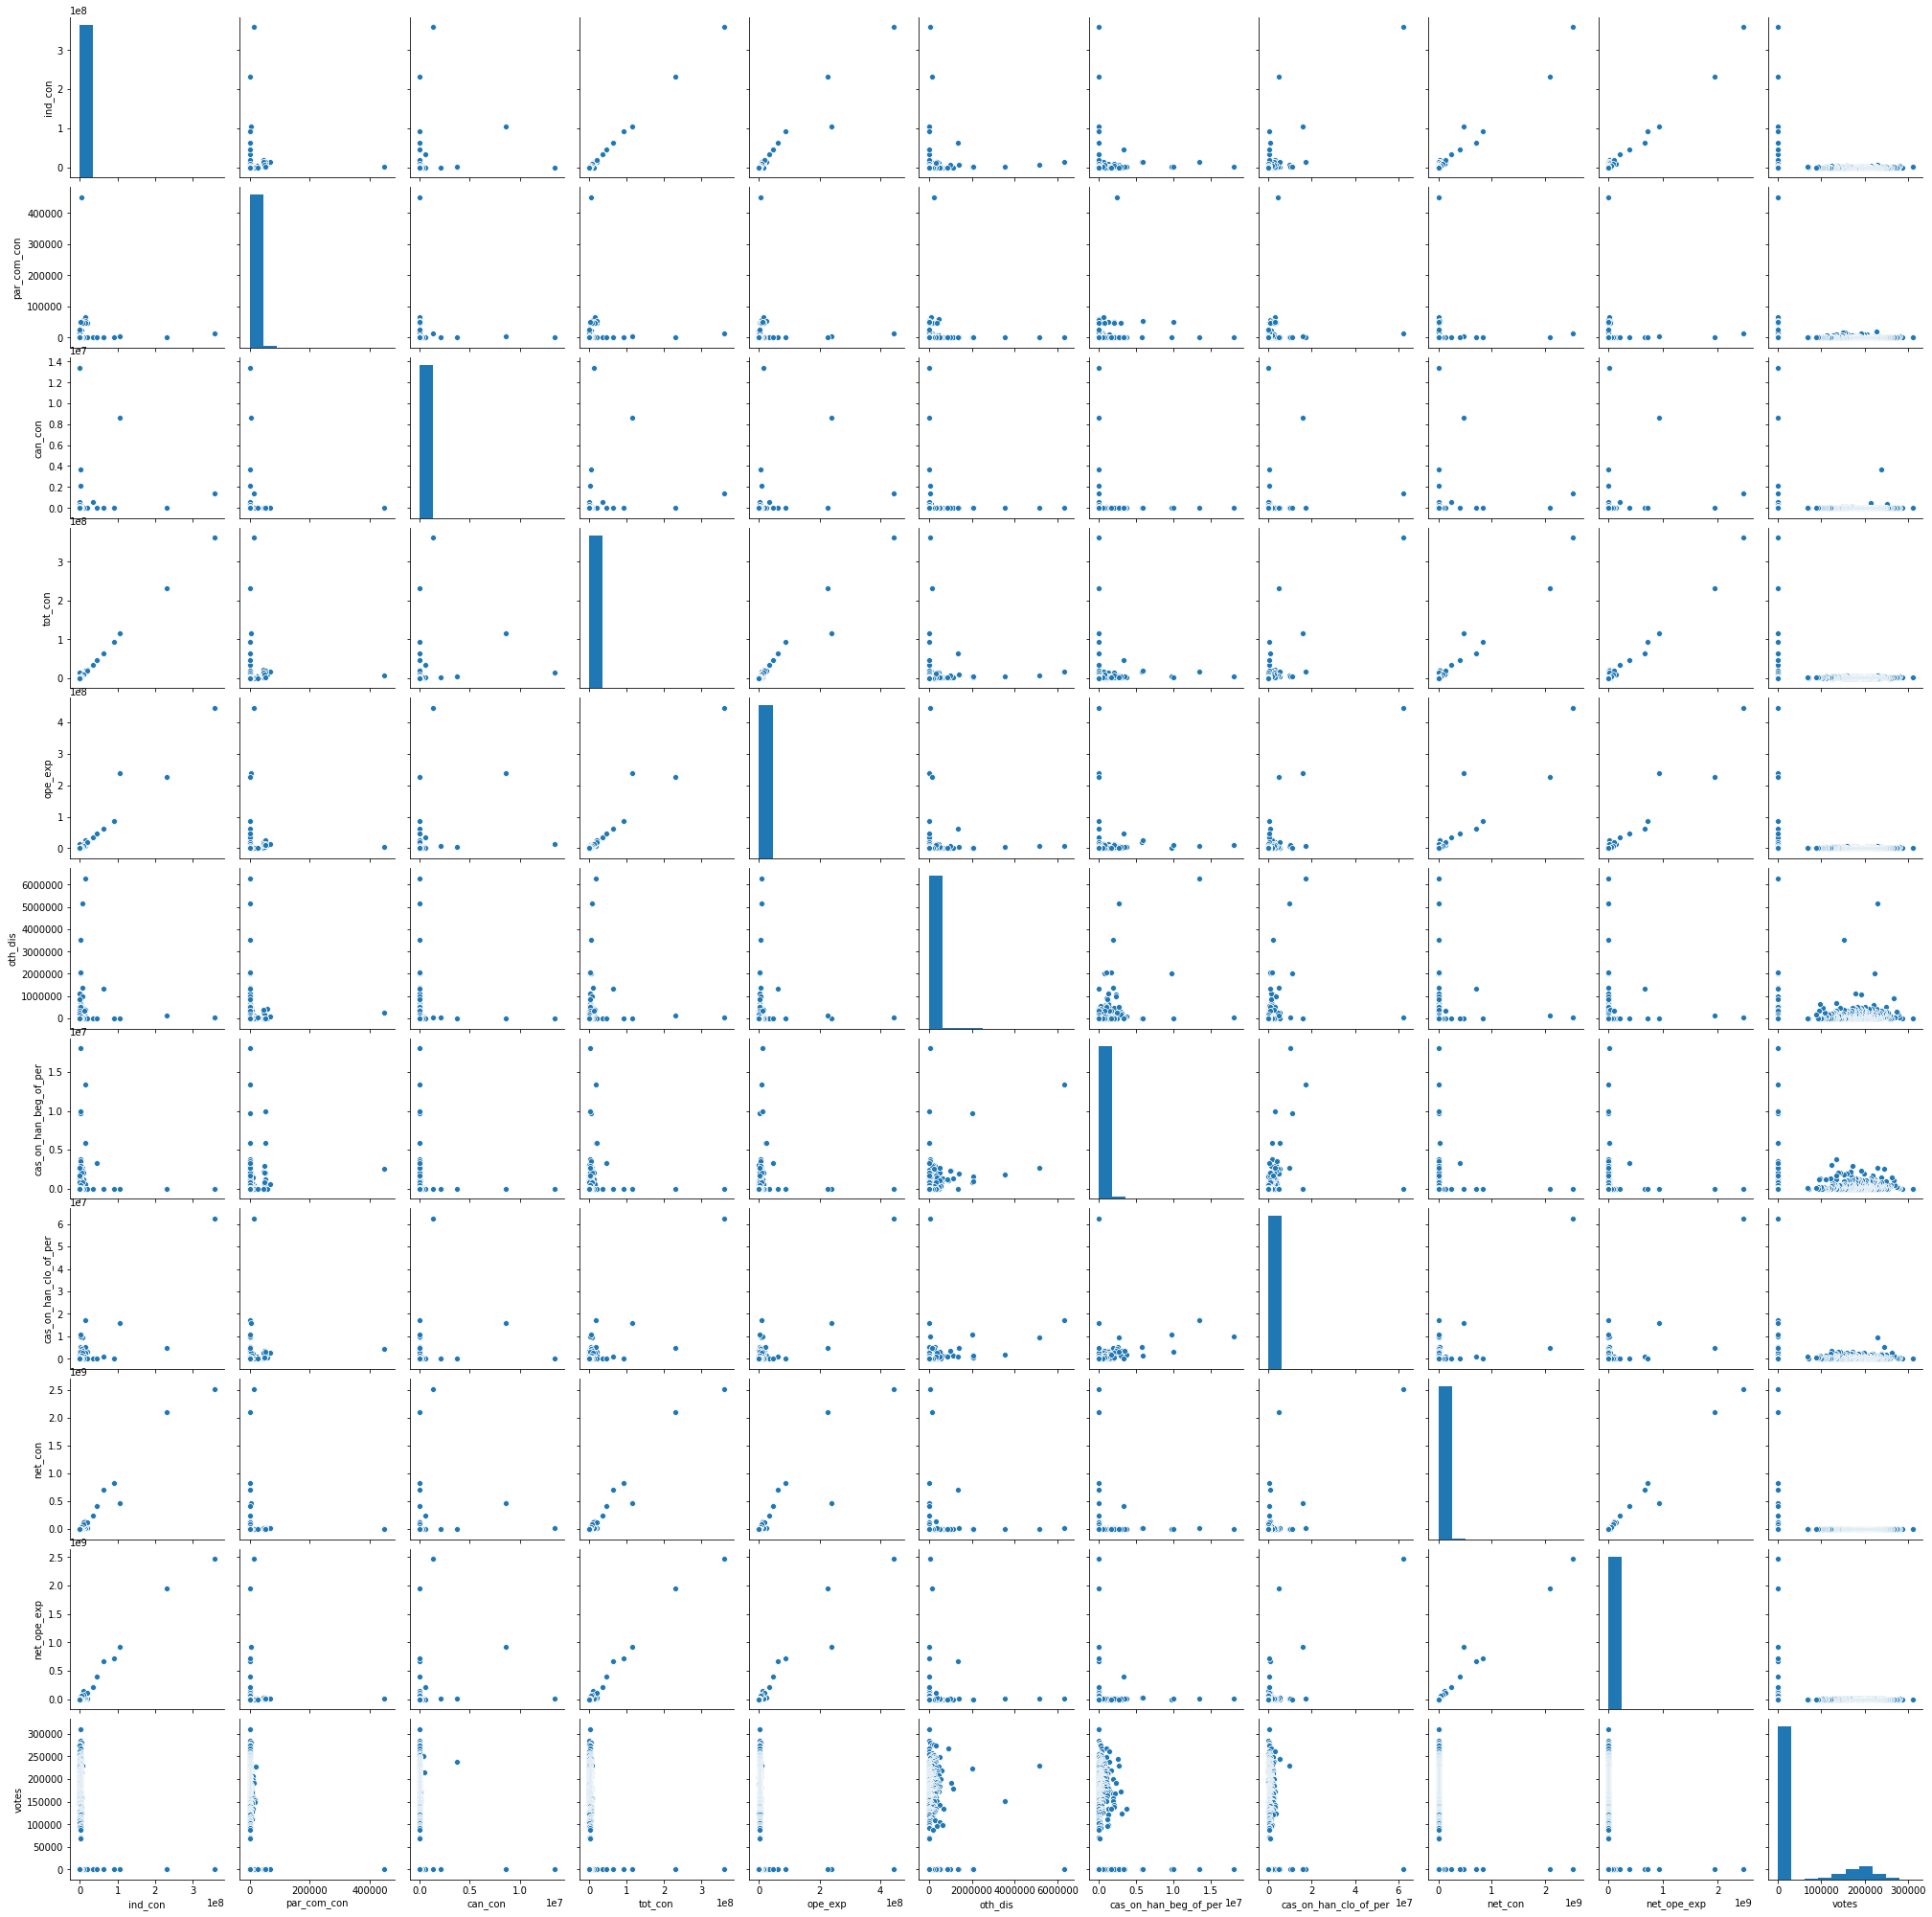

In [12]:
sns.pairplot(seg, height=2.5)
plt.show()

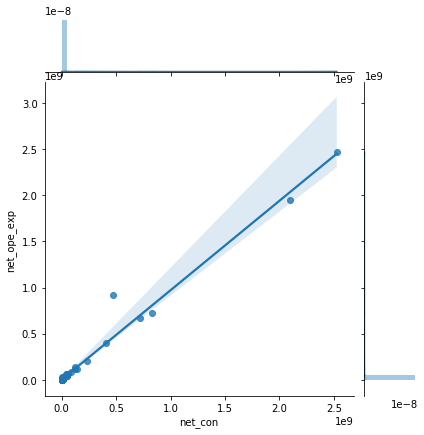

In [13]:
seg1 = seg[['net_con', 'net_ope_exp']]
sns.jointplot(x= 'net_con', y='net_ope_exp', data=seg1, kind = 'reg')
plt.show()

### Linear Regression with Validation Set

In [14]:
# Choose hyperparam
model = LinearRegression(fit_intercept=True)

In [73]:
# Arrange the data
from sklearn.model_selection import train_test_split
# Input & Target Variables
X = seg['net_con'][:, np.newaxis]
y = seg['net_ope_exp']

# split the data with 70% in training 
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1957,
                                  train_size=0.7)

print("TRAINING DATA")
print("The shape of the training predictors (X) is:", Xtrain.shape)
print("The shape of the training test (Y) is:", ytrain.shape)
print("TEST DATA")
print("The shape of the test predictors (X) is:", Xtest.shape)
print("The shape of the test (Y) is:", ytest.shape)

TRAINING DATA
The shape of the training predictors (X) is: (1268, 1)
The shape of the training test (Y) is: (1268,)
TEST DATA
The shape of the test predictors (X) is: (544, 1)
The shape of the test (Y) is: (544,)


In [74]:
# Fit the model
model.fit(Xtrain, ytrain)
print(model.coef_)
print(model.intercept_)

[0.97077126]
201218.58818946872


In [75]:
# Predict
from sklearn.metrics import mean_squared_error, r2_score
# evaluate the model on the test set of data
y_model = model.predict(Xtest)

In [76]:
print('Coefficients: \n', model.coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(ytest, y_model))
print('RMSE : %.2f'
      % np.sqrt(mean_squared_error(ytest, y_model)))
print('Coefficient of determination: %.2f'
      % r2_score(ytest, y_model)) 

Coefficients: 
 [0.97077126]
Mean squared error: 3932149553491.80
RMSE : 1982964.84
Coefficient of determination: 0.99


### Comparing Results with Two Inputs

In [81]:
# Arrange the data
from sklearn.model_selection import train_test_split
X = seg[['net_con', 'ind_con']]
y = seg['net_ope_exp']

# split the data with 70% in training 
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1957,
                                  train_size=0.7)
print("TRAINING DATA")
print("The shape of the training predictors (X) is:", Xtrain.shape)
print("The shape of the training test (Y) is:", ytrain.shape)
print("TEST DATA")
print("The shape of the test predictors (X) is:", Xtest.shape)
print("The shape of the test (Y) is:", ytest.shape)
# Fit the model
model.fit(Xtrain, ytrain)
print(model.coef_)
print(model.intercept_)
# Predict
from sklearn.metrics import mean_squared_error, r2_score
# evaluate the model on the test set of data
y_model = model.predict(Xtest)
print('Coefficients: \n', model.coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(ytest, y_model))
print('RMSE : %.2f'
      % np.sqrt(mean_squared_error(ytest, y_model)))
print('Coefficient of determination: %.2f'
      % r2_score(ytest, y_model))

TRAINING DATA
The shape of the training predictors (X) is: (1268, 2)
The shape of the training test (Y) is: (1268,)
TEST DATA
The shape of the test predictors (X) is: (544, 2)
The shape of the test (Y) is: (544,)
[0.50991403 3.59592265]
-1159263.4882611549
Coefficients: 
 [0.50991403 3.59592265]
Mean squared error: 29357708729022.81
RMSE : 5418275.44
Coefficient of determination: 0.92
